In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
#Importamos la base de datos
df = pd.read_csv(r'C:\Users\juanc\Desktop\proyecto ML\proyecto machine learning\3-Machine-Learning\Entregas\ML_project\salaries _2.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Análisis exploratorio de los datos**

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [7]:
df.info()
#No hay ningun NAN. 
#Para el analisis posterior sera necesario pasar alguna columna de obj a numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  16494 non-null  object
 1   job_title         16494 non-null  object
 2   salary_in_usd     16494 non-null  int64 
 3   company_location  16494 non-null  object
dtypes: int64(1), object(3)
memory usage: 515.6+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


***Eliminamos las columnas que no nos hagan falta***


In [6]:
df = df.drop(columns=['salary_currency', 'salary',"work_year","employment_type","remote_ratio","employee_residence","company_size"])
#la columna salary_currency, salary y salary_in_usd dice lo mismo asi que me quedo unicamente con salary_in_usd

### **Pasamos las columnas de type object a int, antes de esto analizamos cada columna si tiene mas sentido pasarlo a binario o continua**

#### 1. Columna Experiencie_level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

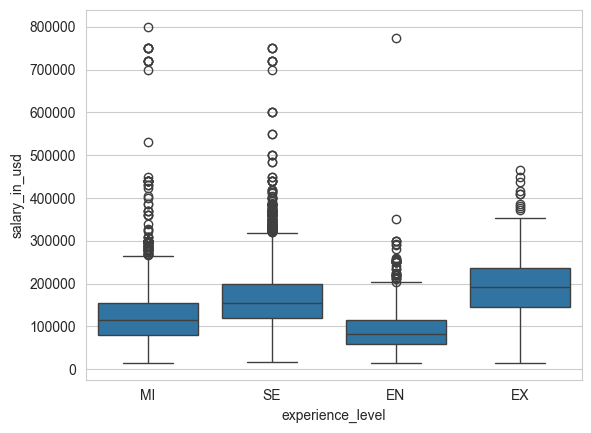

In [8]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
#en=entry, mi=middle, se=senior, ex=Executive-level / Director
#vemos que a mayor experiencia mayor sueldo por lo que tiene sentido pasarlo a una variable continua

In [10]:
# Pasar la columna de str a int
df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

C:\Users\juanc\AppData\Local\Temp\ipykernel_10752\3770702301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})


#### 2. Columna Company_location

In [11]:
company_location_counts =df['company_location'].value_counts()
# Identificar los paises que aparecen menos de 30 veces
company_location_remove = company_location_counts[company_location_counts < 30].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['company_location'].isin(company_location_remove)]
#solo nos quedamos las que almenos sean 30
#us esta sobrepresentado hay que disminuirlo
company_location_counts

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

In [12]:
# Selecciona todas las filas de la clase "US"
us_rows = df[df['company_location'] == 'US']

# Si hay más de 2000 filas de la clase "US", submuestrea aleatoriamente 2000 filas
if len(us_rows) > 2000:
    us_sampled_rows = us_rows.sample(n=2000, random_state=42)
else:
    us_sampled_rows = us_rows

# Selecciona todas las filas que no son de la clase "US"
non_us_rows = df[df['company_location'] != 'US']

# Combina las filas submuestreadas de la clase "US" con las filas que no son de la clase "US"
df = pd.concat([us_sampled_rows, non_us_rows])


In [13]:
df.groupby('company_location').mean('salary_in_usd')
#vemos que paises tienen un salario medio similar para agruparlos a la hora de pasarlo a numerico para meterlo en los modelos


,experience_level,salary_in_usd
company_location,,
AU,2.000000,127800.701754
CA,2.661538,145918.096703
DE,2.142857,94098.514286
ES,2.631579,56342.503759
FR,2.138462,87970.015385
GB,2.311239,93228.488473
IN,2.158730,42726.396825
NL,2.031250,75759.937500
US,2.684000,156538.816500


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

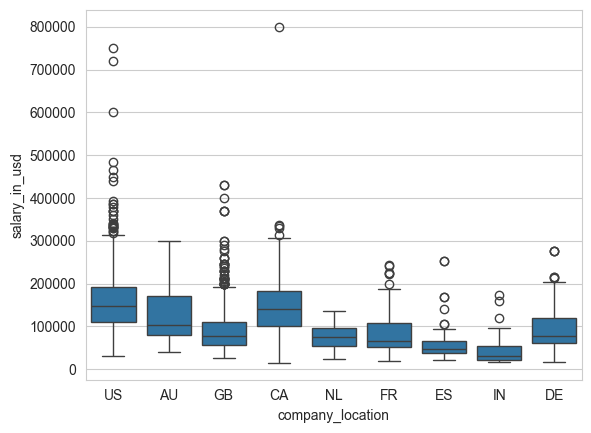

In [14]:
sns.boxplot(x='company_location', y='salary_in_usd', data=df)

In [15]:
df = pd.get_dummies(df, columns=['company_location'])
df



,experience_level,job_title,salary_in_usd,company_location_AU,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_NL,company_location_US
13812,3,Data Engineer,139500,False,False,False,False,False,False,False,False,True
9280,2,Data Analyst,78000,False,False,False,False,False,False,False,False,True
1984,1,Data Analyst,64000,False,False,False,False,False,False,False,False,True
7911,3,Applied Scientist,222200,False,False,False,False,False,False,False,False,True
6745,2,Data Science,115000,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16467,2,Data Scientist,38776,False,False,False,True,False,False,False,False,False
16468,2,Data Scientist,46809,False,False,False,True,False,False,False,False,False
16474,2,Lead Data Analyst,19609,False,False,False,False,False,False,True,False,False
16478,2,Data Engineer,45391,False,False,False,False,False,False,False,True,False


#### 3. Columna Employment_type

#### 4. Columna Job_title

In [16]:
job_title_counts = df['job_title'].value_counts()
#Considero que todos los trabajos en los que tenga menos de 50 personas no hay data suficiente y el resultado puede estar muy sesgado por el azar por lo que los elimino

In [17]:
# Identificar los trabajos que aparecen menos de 50 veces
job_title_remove = job_title_counts[job_title_counts < 50].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['job_title'].isin(job_title_remove)]

In [18]:
df['job_title'].value_counts()
#las que tienen 50-100 counts no las eliminamos porque vemos que muchas son puestos de manager/jefe por lo que tiene sentido que haya menos pero esa informacion nos es relevante mantenerla

job_title
Data Scientist                   755
Data Engineer                    743
Data Analyst                     528
Machine Learning Engineer        368
Analytics Engineer               110
Research Scientist               101
Data Architect                    94
Business Intelligence Analyst     59
Applied Scientist                 57
Data Science                      55
Name: count, dtype: int64

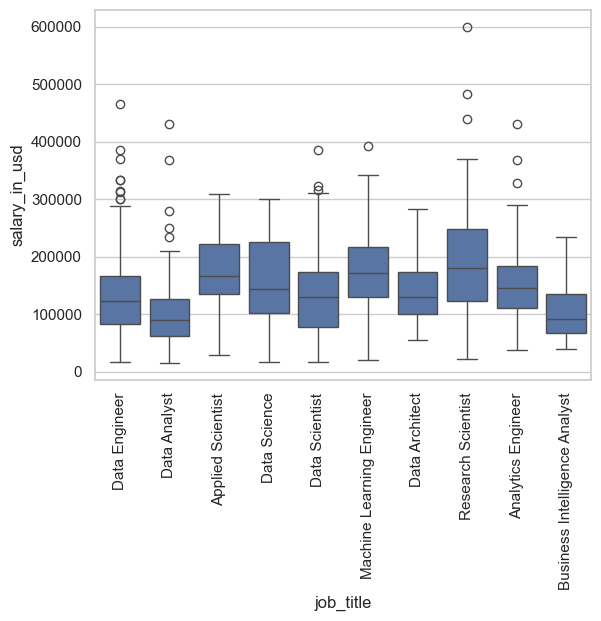

In [19]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja
sns.boxplot(x='job_title', y='salary_in_usd', data=df)

# Rota los nombres del eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()



In [20]:
df.groupby('job_title').mean('salary_in_usd')

,experience_level,salary_in_usd,company_location_AU,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_NL,company_location_US
job_title,,,,,,,,,,,
Analytics Engineer,2.754545,154354.963636,0.000000,0.181818,0.000000,0.000000,0.018182,0.290909,0.000000,0.009091,0.500000
Applied Scientist,2.771930,183156.912281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Business Intelligence Analyst,2.271186,105533.542373,0.067797,0.203390,0.000000,0.000000,0.000000,0.220339,0.000000,0.000000,0.508475
Data Analyst,2.240530,97053.827652,0.018939,0.092803,0.011364,0.034091,0.011364,0.259470,0.009470,0.007576,0.554924
Data Architect,2.978723,138372.968085,0.021277,0.148936,0.000000,0.000000,0.000000,0.212766,0.000000,0.000000,0.617021
Data Engineer,2.588156,130022.292059,0.006729,0.095559,0.021534,0.034993,0.012113,0.224764,0.009421,0.009421,0.585464
Data Science,2.618182,158621.000000,0.000000,0.109091,0.054545,0.000000,0.018182,0.109091,0.000000,0.000000,0.709091
Data Scientist,2.600000,130564.899338,0.013245,0.149669,0.026490,0.079470,0.030464,0.156291,0.015894,0.009272,0.519205
Machine Learning Engineer,2.720109,173886.394022,0.021739,0.173913,0.032609,0.010870,0.013587,0.125000,0.016304,0.013587,0.592391


In [21]:
df = pd.get_dummies(df, columns=['job_title'])
#creamos de variables dummy


#### 5. Columna Employee_residence

#### 6. Columna remote_ratio

#### 7. Columna Company_size

### **Una vez que hemos limpiado la data vamos a ver la relaciones entre las variables**

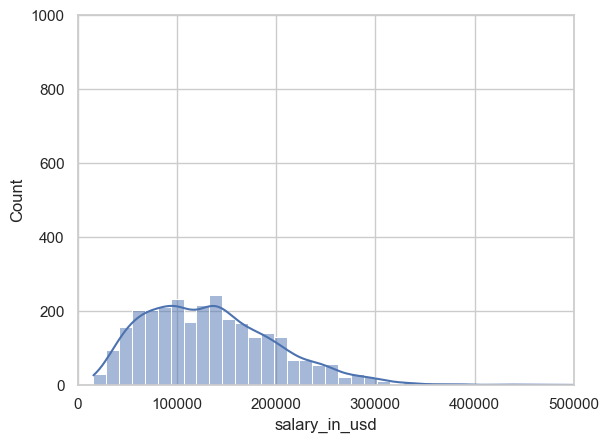

In [22]:
# Crear el histograma con Seaborn
sns.histplot(df['salary_in_usd'], kde=True)

# Ajustar la escala del eje x y el eje y (opcional)
plt.xlim(0, 500000)  # Ajustar los valores según el rango de tus datos
plt.ylim(0, 1000)     # Ajustar los valores según el rango de tus datos

# Mostrar el gráfico
plt.show()

#vemos que la targer salary tiene una distribucion mas o menos normal, por lo que estaria ok para nuestro modelo



In [29]:


# Calcula la matriz de correlación entre todas las columnas 
df.corr()



,experience_level,salary_in_usd,company_location_AU,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_NL,...,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Business Intelligence Analyst,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist
experience_level,1.000000,0.423342,-0.090001,0.073909,-0.102343,0.026212,-0.098195,-0.200837,-0.098450,-0.082096,...,0.055353,0.043013,-0.060136,-0.217940,0.110110,0.023011,0.011454,0.033397,0.087418,0.006342
salary_in_usd,0.423342,1.000000,-0.001273,0.080773,-0.094103,-0.234850,-0.093961,-0.303158,-0.152237,-0.087915,...,0.060559,0.104543,-0.061913,-0.263174,0.011804,-0.035956,0.051326,-0.031496,0.228446,0.155448
company_location_AU,-0.090001,-0.001273,1.000000,-0.044451,-0.017004,-0.023652,-0.015469,-0.056698,-0.012265,-0.011222,...,-0.023432,-0.016708,0.067832,0.021943,0.012219,-0.035017,-0.016406,-0.001774,0.026998,-0.022416
company_location_CA,0.073909,0.080773,-0.044451,1.000000,-0.054867,-0.076318,-0.049913,-0.182943,-0.039574,-0.036211,...,0.033985,-0.053910,0.034098,-0.046781,0.013057,-0.053314,-0.006898,0.043714,0.056132,-0.009529
company_location_DE,-0.102343,-0.094103,-0.017004,-0.054867,1.000000,-0.029195,-0.019094,-0.069984,-0.015139,-0.013852,...,-0.028923,-0.020623,-0.020989,-0.030764,-0.026659,0.004069,0.033481,0.024980,0.032571,-0.001017
company_location_ES,0.026212,-0.234850,-0.023652,-0.076318,-0.029195,1.000000,-0.026559,-0.097345,-0.021058,-0.019268,...,-0.040230,-0.028686,-0.029195,-0.012096,-0.037082,-0.012303,-0.028168,0.124786,-0.055758,0.000572
company_location_FR,-0.098195,-0.093961,-0.015469,-0.049913,-0.019094,-0.026559,1.000000,-0.063665,-0.013772,-0.012601,...,0.001709,-0.018761,-0.019094,-0.020927,-0.024252,-0.022630,0.001196,0.061758,-0.010321,0.018620
company_location_GB,-0.200837,-0.303158,-0.056698,-0.182943,-0.069984,-0.097345,-0.063665,1.000000,-0.050478,-0.046187,...,0.051843,-0.068763,0.011519,0.085189,0.011073,0.053670,-0.028589,-0.050199,-0.062862,-0.072946
company_location_IN,-0.098450,-0.152237,-0.012265,-0.039574,-0.015139,-0.021058,-0.013772,-0.050478,1.000000,-0.009991,...,-0.020861,-0.014875,-0.015139,-0.006117,-0.019229,-0.007891,-0.014606,0.029436,0.020417,-0.001664
company_location_NL,-0.082096,-0.087915,-0.011222,-0.036211,-0.013852,-0.019268,-0.012601,-0.046187,-0.009991,1.000000,...,0.000067,-0.013611,-0.013852,-0.007434,-0.017594,0.002258,-0.013365,0.001339,0.018327,0.021654


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2857 entries, 13812 to 16478
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   work_year                                2857 non-null   int64
 1   experience_level                         2857 non-null   int64
 2   salary_in_usd                            2857 non-null   int64
 3   remote_ratio                             2857 non-null   int64
 4   company_location                         2857 non-null   int64
 5   company_size                             2857 non-null   int64
 6   is_outlier                               2857 non-null   int32
 7   job_title_Analytics Engineer             2857 non-null   bool 
 8   job_title_Applied Scientist              2857 non-null   bool 
 9   job_title_Business Intelligence Analyst  2857 non-null   bool 
 10  job_title_Data Analyst                   2857 non-null   bool 
 11  job_

In [40]:
!pip install xgboost

In [30]:
import xgboost

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import 
from xgboost import XGBRegressor

SyntaxError: invalid syntax (1346443695.py, line 4)

In [32]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

### **XGBoost**

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# XGBoost
from xgboost import XGBRegressor

# Crear y ajustar el modelo XGBoost
xgboost_model = XGBRegressor(n_estimators=100, random_state=0)
xgboost_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train = mean_absolute_error(y, xgboost_model.predict(X))
print(f"Mean Absolute Error on Training Set: {mae_train}")

# Calcular el error absoluto medio en porcentaje
mae_train_percentage = (mae_train / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Percentage): {mae_train_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
xgboost_mae_scores = -cross_val_score(xgboost_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv = xgboost_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation: {mean_mae_cv}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_percentage = (mean_mae_cv / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Percentage): {mean_mae_cv_percentage:.2f}%")



Mean Absolute Error on Training Set: 35958.29372379954
Mean Absolute Error on Training Set (Percentage): 26.82%
Mean Absolute Error with Cross Validation: 39714.55658618249
Mean Absolute Error with Cross Validation (Percentage): 29.62%


### **RandomForest**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_rf = mean_absolute_error(y, rf_model.predict(X))
print(f"Mean Absolute Error on Training Set (Random Forest): {mae_train_rf}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_rf_percentage = (mae_train_rf / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Random Forest, Percentage): {mae_train_rf_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
rf_mae_scores = -cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_rf = rf_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Random Forest): {mean_mae_cv_rf}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_rf_percentage = (mean_mae_cv_rf / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Random Forest, Percentage): {mean_mae_cv_rf_percentage:.2f}%")



Mean Absolute Error on Training Set (Random Forest): 36082.358223117175
Mean Absolute Error on Training Set (Random Forest, Percentage): 26.91%
Mean Absolute Error with Cross Validation (Random Forest): 39571.812806623355
Mean Absolute Error with Cross Validation (Random Forest, Percentage): 29.51%


### **Regresion Lineal**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear = mean_absolute_error(y, linear_model.predict(X))
print(f"Mean Absolute Error on Training Set (Linear Regression): {mae_train_linear}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_percentage = (mae_train_linear / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Linear Regression, Percentage): {mae_train_linear_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_mae_scores = -cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear = linear_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Linear Regression): {mean_mae_cv_linear}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_percentage = (mean_mae_cv_linear / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Linear Regression, Percentage): {mean_mae_cv_linear_percentage:.2f}%")


Mean Absolute Error on Training Set (Linear Regression): 38105.30069686411
Mean Absolute Error on Training Set (Linear Regression, Percentage): 28.42%
Mean Absolute Error with Cross Validation (Linear Regression): 39259.12369337979
Mean Absolute Error with Cross Validation (Linear Regression, Percentage): 29.28%


### **Polinomica 2**

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly_degree_2 = LinearRegression()
linear_model_poly_degree_2.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly_degree_2 = mean_absolute_error(y, linear_model_poly_degree_2.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): {mae_train_linear_poly_degree_2}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_degree_2_percentage = (mae_train_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): {mae_train_linear_poly_degree_2_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores_degree_2 = -cross_val_score(linear_model_poly_degree_2, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly_degree_2 = linear_poly_mae_scores_degree_2.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): {mean_mae_cv_linear_poly_degree_2}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_degree_2_percentage = (mean_mae_cv_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): {mean_mae_cv_linear_poly_degree_2_percentage:.2f}%")


Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): 36868.806620209056
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): 27.50%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): 403008805629794.8
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): 300557626054.43%


### **Polinomica 3**

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly = mean_absolute_error(y, linear_model_poly.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3): {mae_train_linear_poly}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_percentage = (mae_train_linear_poly / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3, Percentage): {mae_train_linear_poly_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores = -cross_val_score(linear_model_poly, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly = linear_poly_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3): {mean_mae_cv_linear_poly}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_percentage = (mean_mae_cv_linear_poly / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3, Percentage): {mean_mae_cv_linear_poly_percentage:.2f}%")



Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3): 36194.794468641114
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3, Percentage): 26.99%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3): 766794535291109.2
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3, Percentage): 571863299211.16%
